## Data Science Wikipedia Analysis

In [1]:
url = 'https://en.wikipedia.org/wiki/Data_science'

## 1. Getting the data

In [2]:
import requests

text = requests.get(url).content.decode('utf-8')
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Data science - Wikipedia</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )enwikimwclientprefs=

### We have been able to extract the Elements code from wikipaedia using requests module.

## 2. Transforming the data

In [5]:
from os import replace
# Using HTML Parser to covert the HTML code to plaintext
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
  script = False
  res = ""

  # Function to handle the start tags of the HTML code.
  def handle_starttag(self, tag:str, attrs:str):
    if tag.lower() in ['script', 'style']:
      self.script = True

  # Function to handle the end tags of the HTML code.
  def handle_endtag(self, tag:str):
    if tag.lower() in ['script', 'style']:
      self.script = False

  # Function to handle the rest of the data
  def handle_data(self, data:str):
    if str.strip(data) == "" or self.script:
      return
    self.res += '' + data.replace('[edit]', '')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Data science - WikipediaJump to contentMain menuMain menumove to sidebarhide
		Navigation
	Main pageContentsCurrent eventsRandom articleAbout WikipediaContact usDonate
		Contribute
	HelpLearn to editCommunity portalRecent changesUpload fileLanguagesLanguage links are at the top of the page across from the title.SearchCreate accountLog inPersonal toolsCreate accountLog in
		Pages for logged out editors learn moreContributionsTalkContentsmove to sidebarhide(Top)1Foundations
				Toggle Foundations subsection
			1.1Relationship to statistics2Etymology
				Toggle Etymology subsection
			2.1Early usage2.2Modern usage3Data Science And Data Analysis4See also5ReferencesToggle the table of contentsToggle the table of contentsData science45 languagesالعربيةAzərbaycancaবাংলাБългарскиCatalàČeštinaDeutschEestiΕλληνικάEspañolEsperantoEuskaraفارسیFrançais한국어Հայերենहिन्दीBahasa IndonesiaIsiZuluItalianoעבריתಕನ್ನಡҚазақшаLatviešuМакедонскиBahasa Melayuမြန်မာဘာသာNederlands日本語Norsk bokmålOʻzbekcha / ўзбекч

## 3. Getting Insights

In [6]:
# Using Rake to get insights by getting the most occurent keywords.
import sys
!{sys.executable} -m pip install nlp_rake

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=4eb78f58873cc48951ba6ef51a84e06ef5bd0ff2e7195a9cc069db00244eba67
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [7]:
# Using Rake to set the minimum length of a keyword to 5 characters,
# minimum frequency of a keyword in the document to 3
# maximum number of words in a keyword - to 2.
import nlp_rake
extractor = nlp_rake.Rake(max_words=2,min_freq=3,min_chars=5)
res = extractor.apply(text)
res

[('data scientist', 4.0),
 ('data visualization', 4.0),
 ('machine learning', 4.0),
 ('data mining', 4.0),
 ('sexiest job', 4.0),
 ('21st century', 4.0),
 ('big data', 4.0),
 ('data scientists', 4.0),
 ('data science', 3.9242424242424243),
 ('information science', 3.9242424242424243),
 ('computer science', 3.9242424242424243),
 ('statistical learning', 3.9),
 ('data analysis', 3.7142857142857144),
 ('science', 1.9242424242424243),
 ('analysis', 1.7142857142857142),
 ('insights', 1.6666666666666667),
 ('field', 1.3333333333333333),
 ('computational', 1.25),
 ('statistics', 1.2272727272727273),
 ('thomas', 1.2),
 ('mathematics', 1.0),
 ('education', 1.0),
 ('communications', 1.0),
 ('archived', 1.0),
 ('original', 1.0),
 ('chikio', 1.0),
 ('^davenport', 1.0),
 ('forbes', 1.0)]

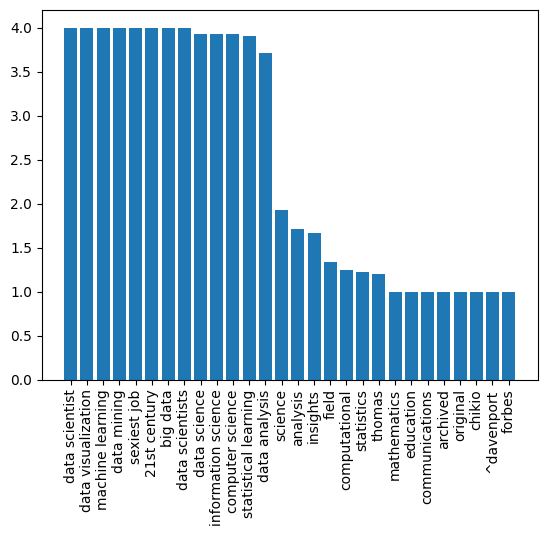

In [8]:
# Visualizing the results
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [9]:
# A better way to analyze text is using a wordcloud
!{sys.executable} -m pip install wordcloud  # Installing Wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


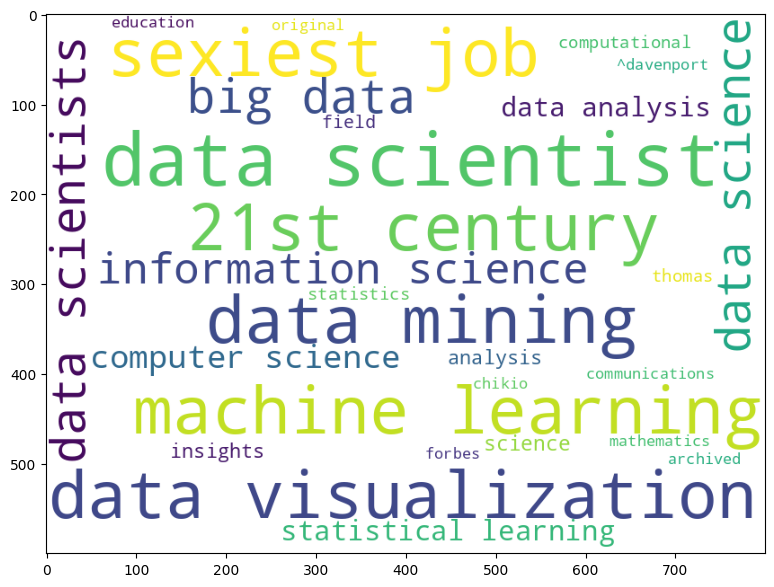

In [10]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

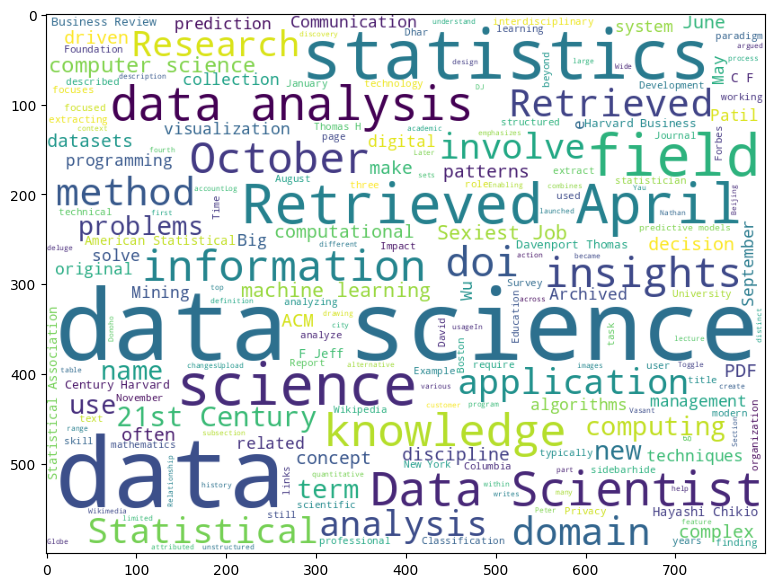

In [11]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))